Tema: Arbol de decisiones
Presentado a: Doctor Breyner Parra
Materia: Analisis de Datos
Estudiante: Juan Carlos Pulido Sierra

In [ ]:
*******************************************************************************************
Que es el arbol de decisiones: es un modelo de aprendizaje automático que utiliza un enfoque de división recursiva para clasificar o predecir datos. 
Divide el conjunto de datos en subconjuntos más pequeños basados en características particulares, creando un árbol de decisiones que puede ser
interpretado para comprender la lógica de toma de decisiones del modelo en cada paso.

*******************************************************************************************
Ejercicio Propuesto: Analizar el Dataset el cual contiene información técnica y de mercado de vino. 
El objetivo es predecir el precio del automóvil en función de sus atributos siguendo el siguiente modelo:



    1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
    2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
    3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
    4. Dividir el dataset en Train y Test para evaluar correctamente el modelo
    5. Entrenar el modelo configurando los diferentes hiperparámetros
    6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc
    7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
    8. Interpretar, analizar y documentar los resultados obtenidos
    9. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/

In [2]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [3]:
#Cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv("./winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.shape

(1599, 12)

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

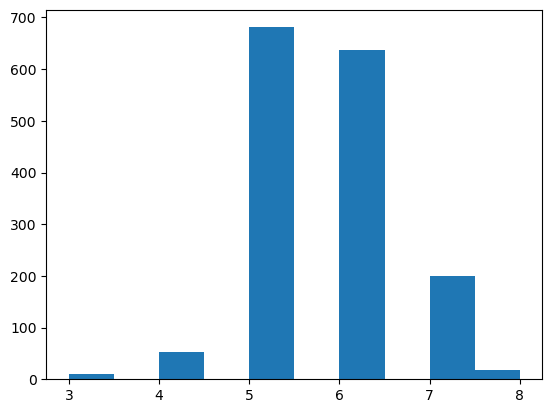

In [8]:
plt.hist(data.quality)

<Axes: xlabel='pH', ylabel='alcohol'>

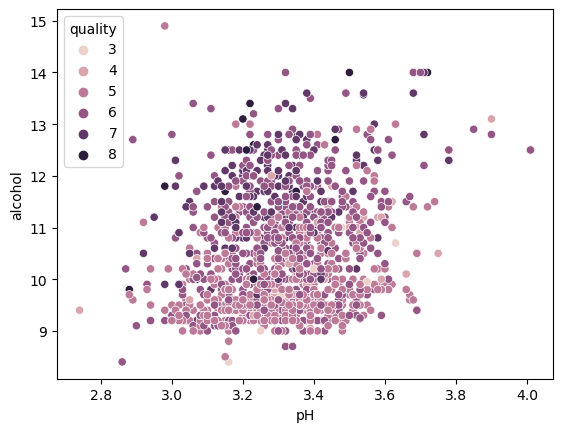

In [11]:
sns.scatterplot(x = "pH", y = "alcohol", hue = "quality", data = data)

In [23]:
predictors_col = ["density", "pH", "sulphates", "alcohol"]
target_col = ['quality']

In [24]:
predictors = data[predictors_col]
target = data[target_col]

In [25]:
predictors

,density,pH,sulphates,alcohol
0,0.99780,3.51,0.56,9.4
1,0.99680,3.20,0.68,9.8
2,0.99700,3.26,0.65,9.8
3,0.99800,3.16,0.58,9.8
4,0.99780,3.51,0.56,9.4
...,...,...,...,...
1594,0.99490,3.45,0.58,10.5
1595,0.99512,3.52,0.76,11.2
1596,0.99574,3.42,0.75,11.0
1597,0.99547,3.57,0.71,10.2


In [26]:
target


,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [27]:
corr = predictors.corr()
corr

,density,pH,sulphates,alcohol
density,1.000000,-0.341699,0.148506,-0.496180
pH,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.148506,-0.196648,1.000000,0.093595
alcohol,-0.496180,0.205633,0.093595,1.000000


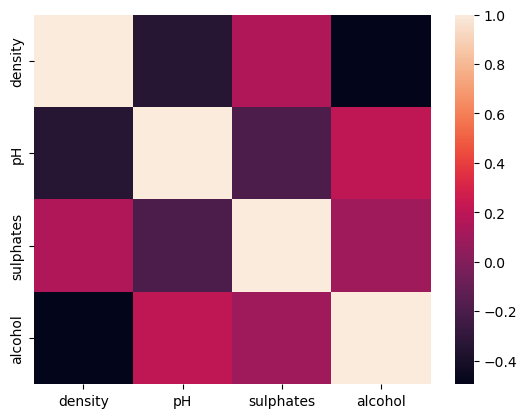

In [28]:
sns.heatmap(corr)
plt.show()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.25, random_state=13)

In [30]:
tree = DecisionTreeClassifier()

In [31]:
arbol = tree.fit(X_train, y_train)

[Text(0.512798124609497, 0.975, 'x[3] <= 10.525\ngini = 0.644\nsamples = 1199\nvalue = [8, 42, 500, 487, 150, 12]'),
 Text(0.21007961379256482, 0.925, 'x[2] <= 0.535\ngini = 0.542\nsamples = 725\nvalue = [5, 27, 423, 246, 24, 0]'),
 Text(0.05123398937831927, 0.875, 'x[3] <= 9.533\ngini = 0.369\nsamples = 173\nvalue = [2, 13, 135, 22, 1, 0]'),
 Text(0.023117775695095284, 0.825, 'x[3] <= 9.075\ngini = 0.215\nsamples = 85\nvalue = [0, 5, 75, 5, 0, 0]'),
 Text(0.00999687597625742, 0.775, 'x[2] <= 0.48\ngini = 0.611\nsamples = 6\nvalue = [0, 2, 3, 1, 0, 0]'),
 Text(0.00499843798812871, 0.725, 'x[2] <= 0.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 0, 1, 0, 0]'),
 Text(0.002499218994064355, 0.675, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0]'),
 Text(0.007497656982193065, 0.675, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0, 0]'),
 Text(0.01499531396438613, 0.725, 'x[1] <= 3.23\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3, 0, 0, 0]'),
 Text(0.012496094970321775, 0.675, 'gini = 0.0\

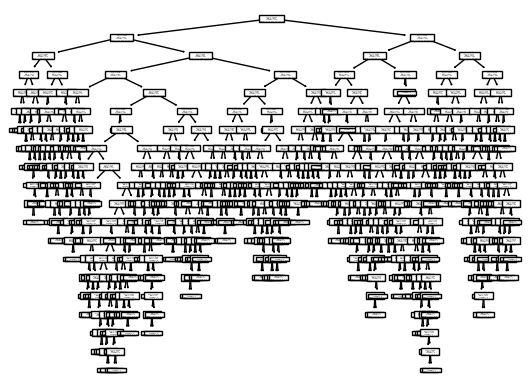

In [32]:
plot_tree(arbol)

In [33]:
predicciones = arbol.predict(X_test)

In [34]:
predicciones

array([7, 4, 5, 5, 7, 5, 5, 7, 5, 5, 5, 6, 5, 5, 7, 6, 6, 7, 5, 7, 5, 6,
       7, 5, 6, 5, 6, 6, 5, 6, 6, 7, 5, 6, 4, 7, 5, 5, 5, 7, 5, 5, 6, 6,
       5, 5, 6, 7, 6, 6, 5, 6, 6, 5, 7, 5, 5, 6, 5, 5, 6, 5, 5, 6, 5, 7,
       6, 6, 5, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5, 6, 7, 7, 6, 5, 6, 6, 7, 6,
       5, 6, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 7, 7, 6, 5, 7, 7, 6, 6, 5, 7,
       4, 6, 5, 5, 5, 6, 7, 7, 5, 7, 5, 5, 5, 7, 5, 5, 5, 5, 6, 7, 6, 4,
       6, 7, 6, 5, 7, 5, 6, 7, 5, 6, 5, 5, 6, 4, 6, 5, 6, 5, 5, 6, 5, 5,
       5, 5, 6, 7, 6, 5, 5, 6, 6, 6, 6, 7, 5, 5, 6, 6, 5, 5, 5, 5, 7, 6,
       5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 7, 5, 8, 7,
       5, 5, 6, 6, 5, 6, 6, 5, 6, 7, 5, 6, 6, 5, 5, 6, 6, 5, 6, 7, 5, 7,
       5, 5, 7, 6, 7, 6, 5, 4, 4, 6, 6, 5, 6, 6, 5, 6, 6, 6, 5, 5, 6, 6,
       5, 5, 5, 6, 8, 5, 5, 7, 6, 6, 5, 5, 6, 6, 3, 5, 5, 7, 5, 6, 6, 5,
       6, 6, 6, 7, 5, 5, 7, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 5, 6, 5,
       7, 7, 6, 5, 6, 6, 5, 7, 5, 7, 5, 5, 5, 5, 5,

In [35]:
# Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,0,0,2,0,0,0
4,1,3,4,2,1,0
5,1,5,117,46,11,1
6,0,2,38,82,27,2
7,0,0,8,14,26,1
8,0,0,0,3,3,0


In [36]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.57

In [ ]:
Analisis de los datos:

Precisión:

La precisión del modelo es del 57%, lo que significa que es capaz de predecir correctamente el 57% de las muestras. Sin embargo, 
respecto a garantizar que el vino sea de mayor calidad, la precisión del modelo no es suficiente para hacer esa afirmación con alta confianza. 
Sería necesario realizar un análisis más detallado para determinar qué características específicas del 
vino están correlacionadas con una mayor calidad y si el modelo es capaz de capturar esas relaciones de manera efectiva.


La matriz de confusión proporciona una visión detallada del rendimiento del modelo:

   * Para la clase 3: Se predijeron correctamente 0, se predijeron como clase 4, 1 como clase 5.
   * Para la clase 4: Se predijeron correctamente 3, 1 como clase 3, 4 como clase 5, 2 como clase 6.
   * Para la clase 5: Se predijeron correctamente 117, 5 como clase 4, 38 como clase 6, 8 como clase 7, 3 como clase 8.
   * Para la clase 6: Se predijeron correctamente 82, 2 como clase 4, 46 como clase 5, 14 como clase 7, 3 como clase 8.
   * Para la clase 7: Se predijeron correctamente 26, 1 como clase 5, 11 como clase 6, 27 como clase 7, 3 como clase 8.
   * Para la clase 8: Se predijeron correctamente 0, 1 como clase 6, 1 como clase 7.
